
[![AnalyticsDojo](https://github.com/rpi-techfundamentals/spring2019-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>Titanic Standardization</h1></center>
<center><h3><a href = 'http://introml.analyticsdojo.com'>introml.analyticsdojo.com</a></h3></center>



# Titanic Standardization

This is an example of standardization.

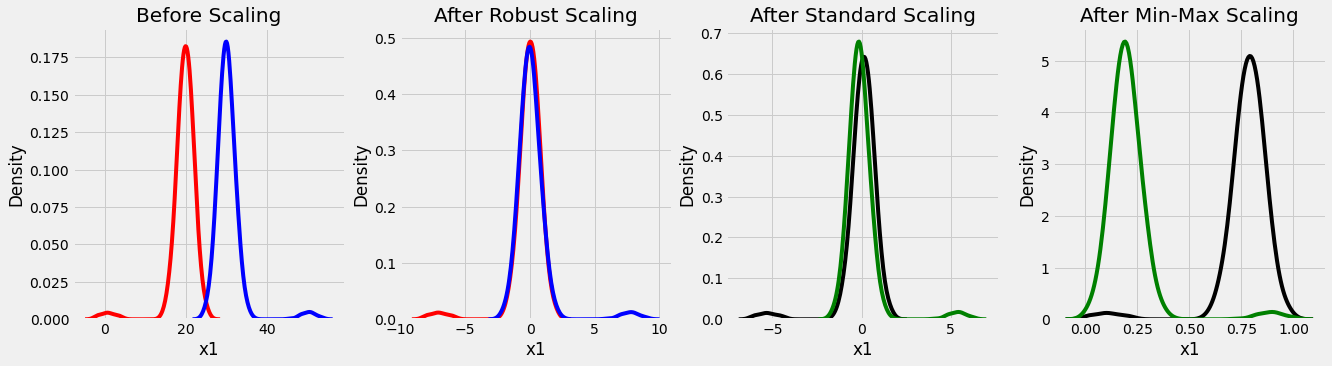

In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('fivethirtyeight')
  
# data
#Notice the values for X1 and X2 have different Standard devaiations. 
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
  
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
  
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
  
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
  
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
  
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
  
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
  
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
  
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

In [6]:
import os
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/test.csv')

print(train.columns, test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Here is a broad description of the keys and what they mean:

```
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
survival        Survival
                (0 = No; 1 = Yes)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
boat            Lifeboat
body            Body Identification Number
home.dest       Home/Destination
```

In general, it looks like `name`, `sex`, `cabin`, `embarked`, `boat`, `body`, and `homedest` may be candidates for categorical features, while the rest appear to be numerical features. We can also look at the first couple of rows in the dataset to get a better understanding:

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Preprocessing function

We want to create a preprocessing function that can address transformation of our train and test set.  

In [8]:
from sklearn.impute import SimpleImputer
import numpy as np

cat_features = ['Pclass', 'Sex', 'Embarked']
num_features =  [ 'Age', 'SibSp', 'Parch', 'Fare'  ]
def preprocess(df, num_features, cat_features, dv):
    features = cat_features + num_features
    if dv in df.columns:
      y = df[dv]
    else:
      y=None 
    #Address missing variables
    print("Total missing values before processing:", df[features].isna().sum().sum() )
  
    imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    df[cat_features]=imp_mode.fit_transform(df[cat_features] )
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    df[num_features]=imp_mean.fit_transform(df[num_features])
    print("Total missing values after processing:", df[features].isna().sum().sum() )
   
    X = pd.get_dummies(df[features], columns=cat_features, drop_first=True)
    return y,X

y, X =  preprocess(train, num_features, cat_features, 'Survived')
test_y, test_X = preprocess(test, num_features, cat_features, 'Survived')

Total missing values before processing: 179
Total missing values after processing: 0
Total missing values before processing: 87
Total missing values after processing: 0


In [9]:
X

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.000000,1.0,0.0,7.2500,0,1,1,0,1
1,38.000000,1.0,0.0,71.2833,0,0,0,0,0
2,26.000000,0.0,0.0,7.9250,0,1,0,0,1
3,35.000000,1.0,0.0,53.1000,0,0,0,0,1
4,35.000000,0.0,0.0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.000000,0.0,0.0,13.0000,1,0,1,0,1
887,19.000000,0.0,0.0,30.0000,0,0,0,0,1
888,29.699118,1.0,2.0,23.4500,0,1,0,0,1
889,26.000000,0.0,0.0,30.0000,0,0,1,0,0


In [10]:
#Standardize
standard_df = scaler.fit_transform(X)
X = pd.DataFrame(standard_df, columns =X.columns)

In [ ]:
#Import Module
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=122, stratify=y)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=10)
#This fits the model object to the data.
classifier.fit(train_X, train_y)
#This creates the prediction. 
train_y_pred = classifier.predict(train_X)
val_y_pred = classifier.predict(val_X)
test_y_pred = classifier.predict(test_X)
print("Metrics score train: ", metrics.accuracy_score(train_y, train_y_pred) )
print("Metrics score validation: ", metrics.accuracy_score(val_y, val_y_pred) )

Metrics score train:  0.7447833065810594
Metrics score validation:  0.7126865671641791


In [ ]:
test['Survived']=classifier.predict(test_X)

In [ ]:
test[['PassengerId','Survived']].to_csv('submission.csv')
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Challenge
Create a function that can accept any Scikit learn model and assess the perfomance in the validation set, storing results as a dataframe. 